<h1 align='center'>Assigment 4</h1>

* Dimitris Stathopoulos f3352318
* dim.stathopoulos@aueb.gr


### Load the compressed form of the connectivity matrix


In [1]:
import pandas as pd
from scipy.sparse import csr_matrix

def load_data_as_dataframe(file_path):
    # Load data into a DataFrame
    df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['source', 'target','proba'])
    display(df)
    return df

def dataframe_to_sparse_matrix(df):
    # Convert DataFrame to a sparse matrix
    num_nodes = max(df['source'].max(), df['target'].max()) + 1
    data = df['proba']
    row = df['source']
    col = df['target']
    sparse_matrix = csr_matrix((data, (row, col)), shape=(num_nodes, num_nodes))
    return sparse_matrix

# Example usage:
file_path = '../stanweb.dat'  # Update with the actual file path
data_df = load_data_as_dataframe(file_path)
sparse_matrix = dataframe_to_sparse_matrix(data_df)
print(sparse_matrix)


,source,target,proba
0,1,6548,0.500000
1,1,15409,0.500000
2,2,252915,0.032258
3,2,246897,0.032258
4,2,251658,0.032258
...,...,...,...
2382907,281903,216688,0.142857
2382908,281903,90591,0.142857
2382909,281903,94440,0.142857
2382910,281903,56088,0.142857


  (1, 6548)	0.5
  (1, 15409)	0.5
  (2, 17794)	0.032258064516129
  (2, 25202)	0.032258064516129
  (2, 53625)	0.032258064516129
  (2, 54582)	0.032258064516129
  (2, 64930)	0.032258064516129
  (2, 73764)	0.032258064516129
  (2, 84477)	0.032258064516129
  (2, 98628)	0.032258064516129
  (2, 100193)	0.032258064516129
  (2, 102355)	0.032258064516129
  (2, 105318)	0.032258064516129
  (2, 105730)	0.032258064516129
  (2, 115926)	0.032258064516129
  (2, 140864)	0.032258064516129
  (2, 163550)	0.032258064516129
  (2, 164599)	0.032258064516129
  (2, 175799)	0.032258064516129
  (2, 178642)	0.032258064516129
  (2, 181714)	0.032258064516129
  (2, 190453)	0.032258064516129
  (2, 204189)	0.032258064516129
  (2, 204604)	0.032258064516129
  (2, 210870)	0.032258064516129
  :	:
  (281898, 166893)	0.142857142857143
  (281898, 191219)	0.142857142857143
  (281898, 231579)	0.142857142857143
  (281898, 266496)	0.142857142857143
  (281898, 275195)	0.142857142857143
  (281899, 30564)	0.333333333333333
  (281899, 2

In [2]:
import numpy as np
from scipy.sparse import csr_matrix

def create_a_vector(sparse_matrix):
    # Compute the sum of each row in the sparse matrix
    row_sum = np.array(sparse_matrix.sum(axis=1)).flatten()
    
    # Initialize the a vector
    a = np.zeros(sparse_matrix.shape[0])
    
    # Set elements of a to 1 where row sum is zero (indicating no out-links)
    a[row_sum == 0] = 1
    
    return a


# Assuming 'sparse_matrix' is your sparse matrix
a_vector = create_a_vector(sparse_matrix)
print("Vector a:", a_vector)
count = 0
for i, value in enumerate(a_vector):
    if value == 1:
        count +=1
print(f"Number of no-outlinks nodes is: {count}")


Vector a: [1. 0. 0. ... 0. 0. 0.]
Number of no-outlinks nodes is: 173


### (a)

**(i)Find π with power method**

In [3]:
import numpy as np
import time

# ANSI color escape codes
class Color:
    GREEN = '\033[92m'
    END = '\033[0m'

def power_method(P, alpha, a, v, tol=1e-8):
    n = P.shape[0]
    x = np.zeros(n) / n  # Initialize the vector π
    iteration = 0
    delta = tol + 1  # Initialize the change in the vector π

    start_time = time.time()  # Start timing

    while True:
        x_next = alpha * x.T @ P + (alpha * x.T @ a + (1 - alpha)) * v.T
        delta = np.linalg.norm(x_next - x, ord=1)
        #print(f"Delta is: {delta}")
        x = x_next

        iteration += 1  # keep track of iteration numbers
        if delta < tol:
            print(f"\nLoop-Break at iter: {iteration}")
            break

    end_time = time.time()  # End timing
    execution_time = end_time - start_time
    print(f"{Color.GREEN}Execution time: {execution_time:.2f} seconds{Color.END}")

    return x

# Define your sparse matrix 'sparse_matrix' and 'a_vector' here

# Specify parameters
alpha = 0.85
tau = 1e-8  # Tolerance threshold

# Define the teleportation vector v (uniform vector in this case)
v = np.ones(sparse_matrix.shape[0]) / sparse_matrix.shape[0]


# Compute PageRank vector using the Power method and measure execution time with color
pi_power = power_method(sparse_matrix, alpha, a_vector, v, tol=tau)
print("\nPageRank vector (Power method):\n", pi_power)
print(f"\nπ vector shape is: {pi_power.shape}")



Loop-Break at iter: 103
Execution time: 2.00 seconds

PageRank vector (Power method):
 [5.33365878e-07 5.33365878e-07 1.17178119e-04 ... 5.37022015e-07
 1.80873639e-06 1.47923122e-06]

π vector shape is: (281904,)


In [4]:
import pandas as pd

def create_sorted_dataframe(pi_power):
    """
    Create a DataFrame from the PageRank vector and sort it based on PageRank values.

    Parameters:
        pi_power (ndarray): PageRank vector obtained using the Power method.

    Returns:
        DataFrame: Sorted DataFrame based on PageRank values.
    """
    # Create a DataFrame from the PageRank vector
    df = pd.DataFrame({'PageRank': pi_power})

    # Sort the DataFrame based on the PageRank values in descending order
    df_sorted = df.sort_values(by='PageRank', ascending=False)

    return df_sorted


# pi_power is the PageRank vector obtained using the Power method
sorted_df_powerM = create_sorted_dataframe(pi_power)
print("\n PageRank based on power method(index is Webpage):")
sorted_df_powerM



 PageRank based on power method(index is Webpage):


,PageRank
89073,1.130283e-02
226411,9.287651e-03
241454,8.297230e-03
262860,3.023115e-03
134832,3.001265e-03
...,...
63457,5.333659e-07
147002,5.333659e-07
206782,5.333659e-07
121531,5.333659e-07


**(ii)Solving the corresponding system**

In [5]:
# Boolean indexing to extract zeros and ones
vec1 = a_vector[a_vector == 0]
vec2 = a_vector[a_vector == 1]

print("Vector containing zeros (vec1):", vec1.shape)
print("Vector containing ones (vec2):", vec2.shape)


Vector containing zeros (vec1): (281731,)
Vector containing ones (vec2): (173,)


In [6]:
import scipy.sparse as sp

# Specify the size of the identity matrix
n = 5  # Number of rows and columns

# Create a sparse identity matrix
sparse_identity = sp.eye(sparse_matrix.shape[0])

print("Sparse Identity Matrix:")
print(sparse_identity)


Sparse Identity Matrix:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0
  (5, 5)	1.0
  (6, 6)	1.0
  (7, 7)	1.0
  (8, 8)	1.0
  (9, 9)	1.0
  (10, 10)	1.0
  (11, 11)	1.0
  (12, 12)	1.0
  (13, 13)	1.0
  (14, 14)	1.0
  (15, 15)	1.0
  (16, 16)	1.0
  (17, 17)	1.0
  (18, 18)	1.0
  (19, 19)	1.0
  (20, 20)	1.0
  (21, 21)	1.0
  (22, 22)	1.0
  (23, 23)	1.0
  (24, 24)	1.0
  :	:
  (281879, 281879)	1.0
  (281880, 281880)	1.0
  (281881, 281881)	1.0
  (281882, 281882)	1.0
  (281883, 281883)	1.0
  (281884, 281884)	1.0
  (281885, 281885)	1.0
  (281886, 281886)	1.0
  (281887, 281887)	1.0
  (281888, 281888)	1.0
  (281889, 281889)	1.0
  (281890, 281890)	1.0
  (281891, 281891)	1.0
  (281892, 281892)	1.0
  (281893, 281893)	1.0
  (281894, 281894)	1.0
  (281895, 281895)	1.0
  (281896, 281896)	1.0
  (281897, 281897)	1.0
  (281898, 281898)	1.0
  (281899, 281899)	1.0
  (281900, 281900)	1.0
  (281901, 281901)	1.0
  (281902, 281902)	1.0
  (281903, 281903)	1.0


In [7]:
import numpy as np
from scipy.sparse import csr_matrix, eye
import time

# ANSI color escape codes
class Color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

def gauss_seidel_sparse(A, b, tol=1e-8, max_iter=1000):
    """
    Gauss-Seidel iterative method for solving Ax = b,
    where A is a sparse matrix in CSR format.

    Parameters:
        A (csr_matrix): Sparse matrix A in CSR format.
        b (ndarray): Right-hand side vector.
        tol (float): Tolerance for convergence.
        max_iter (int): Maximum number of iterations.

    Returns:
        ndarray: Solution vector x.
    """
    n = A.shape[0]
    x = np.zeros(n)
    x_new = np.zeros(n)

    # Convert A to CSR format if not already in CSR
    if not isinstance(A, csr_matrix):
        A = csr_matrix(A)

    for _ in range(max_iter):
        for i in range(n):
            # Compute the new value of x[i] using the latest updated values
            x_new[i] = b[i] - A[i, :].dot(x_new)
            x_new[i] /= A[i, i]

        # Check for convergence
        if np.linalg.norm(x_new - x, ord=1) <= tol:
            break

        # Update x for the next iteration
        x = x_new

    return x

def page_rank_sparse(P, alpha, v=None, tol=1e-8, max_iter=1000):
    """
    Compute PageRank vector using the Gauss-Seidel method
    for a sparse transition probability matrix P.

    Parameters:
        P (csr_matrix): Sparse transition probability matrix.
        alpha (float): Damping factor (usually 0.85).
        v (ndarray): Initial guess vector.
        tol (float): Tolerance for convergence.
        max_iter (int): Maximum number of iterations.

    Returns:
        ndarray: PageRank vector.
    """
    n = P.shape[0]
    if v is None:
        v = np.ones(n) / n

    # Construct the matrix A = (I - alpha * P)
    A = eye(n) - alpha * P

    # Compute the right-hand side vector b
    b = v.copy()

    # Start timing
    start_time = time.time()

    # Solve the equation using Gauss-Seidel method
    pi = gauss_seidel_sparse(A, b, tol=tol, max_iter=max_iter)

    # End timing
    end_time = time.time()

    # Normalize the PageRank vector
    pi /= np.sum(pi)

    execution_time = end_time - start_time
    print(f"Execution time: {Color.GREEN}{execution_time:.2f} seconds")

    return pi

# Define your sparse matrix 'sparse_matrix' here

# Compute PageRank vector using default parameters and measure execution time with color
pagerank = page_rank_sparse(sparse_matrix,alpha)

print("PageRank vector:", pagerank)


C:\Users\stath\AppData\Local\Temp\ipykernel_8392\3018918309.py:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_new[i] = b[i] - A[i, :].dot(x_new)


Execution time: 83.81 seconds
PageRank vector: [ 0.00000000e+00  6.87058100e-06  8.91772937e-06 ... -9.55875913e-06
 -6.73852268e-06 -4.67096145e-06]


In [8]:
create_sorted_dataframe(pagerank)

# pagerank is the PageRank vector obtained using the Gauss-Seidel
sorted_df_GS = create_sorted_dataframe(pi_power)
print("\n PageRank based on Gauss-Seidel(index is Webpage):")
sorted_df_GS



 PageRank based on Gauss-Seidel(index is Webpage):


,PageRank
89073,1.130283e-02
226411,9.287651e-03
241454,8.297230e-03
262860,3.023115e-03
134832,3.001265e-03
...,...
63457,5.333659e-07
147002,5.333659e-07
206782,5.333659e-07
121531,5.333659e-07


In terms of execution times, it's evident that the power method converges more rapidly. This method seems to be a better fit for our problem, especially considering its compatibility with variable initializations like np.ones or np.zeros.

b) Do the previous task with α = 0.99. Your remarks on the convergence speed. Did
the ranking of the first 50 nodes changed?


**for alpha=0.99**

In [9]:
# Our new alpha parameter 
new_alpha = 0.99


# Compute PageRank vector using the Power method and measure execution time with color
pi_power = power_method(sparse_matrix, new_alpha, a_vector, v, tol=tau)
print("===============================Power method Results=================================")
print("\nPageRank vector (Power method):", pi_power)
print(f"\nπ vector shape is: {pi_power.shape}")


print("===============================Gauss-Seidel Linear System Results===================")
pagerank = page_rank_sparse(sparse_matrix, new_alpha)

print("PageRank vector:", pagerank)


Loop-Break at iter: 1376
Execution time: 27.65 seconds
===============================Power method Results=================================

PageRank vector (Power method): [3.61261705e-08 3.61261705e-08 1.04528605e-04 ... 3.64145972e-08
 4.11009422e-07 1.88426133e-07]

π vector shape is: (281904,)
===============================Gauss-Seidel Linear System Results===================


C:\Users\stath\AppData\Local\Temp\ipykernel_8392\3018918309.py:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_new[i] = b[i] - A[i, :].dot(x_new)


Execution time: 70.02 seconds
PageRank vector: [ 0.00000000e+00  5.43222285e-06  7.23601541e-06 ... -6.95255936e-06
 -4.52182112e-06 -2.83402616e-06]


We can see that both methods increased in converage speed so alpha=0.99 did not benefit the algorithms at all in comparison to the latter, that is, 0.85.


In [10]:
import pandas as pd

# Assuming df1 and df2 are your DataFrames

# Slice the first 50 rows of both DataFrames
df1_first_50 = sorted_df_powerM.iloc[:50]
df2_first_50 = sorted_df_GS.iloc[:50]

# Compare the index of the sliced DataFrames
index_equal = df1_first_50.index.equals(df2_first_50.index)

if index_equal:
    print("The row indexing of the first 50 rows in both DataFrames is equal.")
else:
    print("The row indexing of the first 50 rows in both DataFrames is not equal.")


The row indexing of the first 50 rows in both DataFrames is equal.


c) When we use the power method do all the cοmponents of π converge at the same
speed to their limits? If not which of the converge faster: those that correspond
to important nodes or to non important ? Do you observe the same behavior
when you find π through the solution of the linear system?


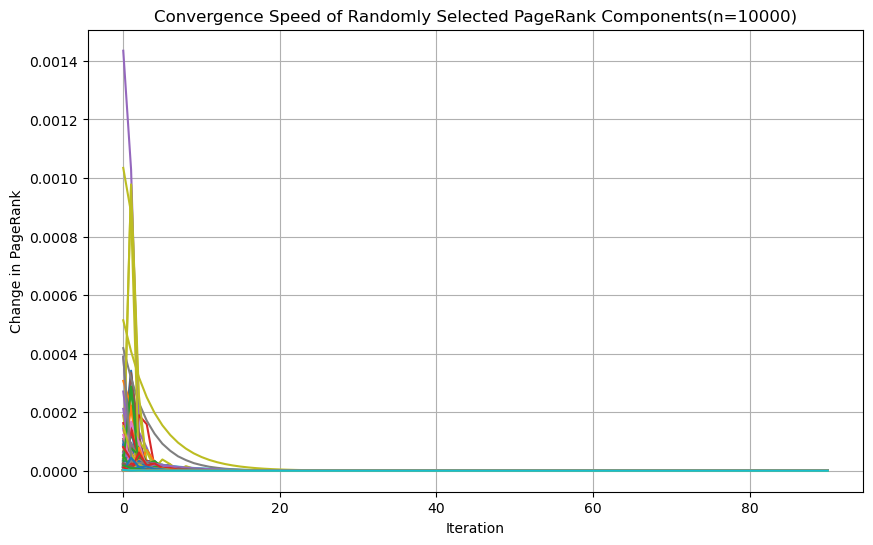

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute PageRank using the power method
def power_method_coverage(P, a, alpha, num_components, tol=1e-8):
    n = P.shape[0]
    x = np.ones(n) / n  # Initialize PageRank vector
    iteration = 0
    delta = tol + 1 


    # Generate a random sample of component indices to track
    components_to_track = np.random.choice(range(n), num_components, replace=False)
    
    # Track convergence speed of selected components
    convergence_speed = {component: [] for component in components_to_track}



    while delta > tol:
        x_next = alpha * x.T@P  + (alpha * x.T@a + (1 - alpha)) * v.T
        delta = np.linalg.norm(x_next - x, ord=1)
        
         # Compute the change in PageRank for each tracked component
        for component in components_to_track:
            convergence_speed[component].append(np.abs(x_next[component] - x[component]))
        
        # Update x
        x = x_next
        iteration += 1 # Keep track of iterations

    return x, convergence_speed

# Specify parameters
alpha = 0.85
tolerance = 1e-8
num_components = 10000
# Compute PageRank using power method
pagerank, convergence_speed = power_method_coverage(sparse_matrix, a_vector, alpha, num_components,  tol=tolerance)



# Plot convergence speed for selected components
plt.figure(figsize=(10, 6))
for component, speed in convergence_speed.items():
    plt.plot(speed, label=f'Component {component}')

plt.xlabel('Iteration')
plt.ylabel('Change in PageRank')
plt.title(f'Convergence Speed of Randomly Selected PageRank Components(n={num_components})')
plt.grid(True)
plt.show()

C:\Users\stath\AppData\Local\Temp\ipykernel_8392\501919884.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_new[i] = b[i] - A[i, :].dot(x_new)


Execution time: 70.29 seconds
PageRank vector: [ 0.00000000e+00  6.87058100e-06  8.91772937e-06 ... -9.55875913e-06
 -6.73852268e-06 -4.67096145e-06]


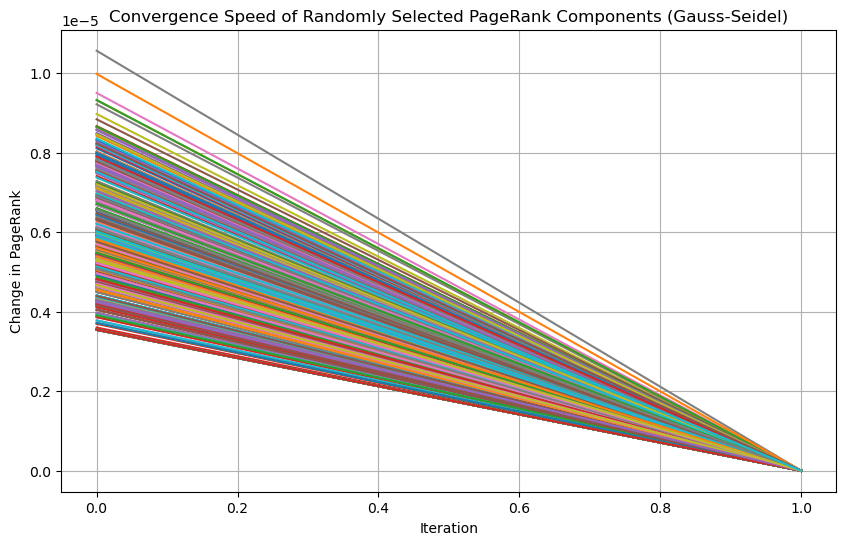

PageRank vector: [ 0.00000000e+00  6.87058100e-06  8.91772937e-06 ... -9.55875913e-06
 -6.73852268e-06 -4.67096145e-06]


In [12]:
import numpy as np
from scipy.sparse import csr_matrix, eye
import time

# ANSI color escape codes
class Color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

def gauss_seidel_sparse(A, b, tol=1e-8, max_iter=1000):
    """
    Gauss-Seidel iterative method for solving Ax = b,
    where A is a sparse matrix in CSR format.

    Parameters:
        A (csr_matrix): Sparse matrix A in CSR format.
        b (ndarray): Right-hand side vector.
        tol (float): Tolerance for convergence.
        max_iter (int): Maximum number of iterations.

    Returns:
        ndarray: Solution vector x.
    """
    n = A.shape[0]
    x = np.zeros(n)
    x_new = np.zeros(n)

    # Convert A to CSR format if not already in CSR
    if not isinstance(A, csr_matrix):
        A = csr_matrix(A)

    # Generate a random sample of component indices to track
    components_to_track = np.random.choice(range(n), num_components, replace=False)
    
    # Track convergence speed of selected components
    convergence_speed = {component: [] for component in components_to_track}


    for _ in range(max_iter):
        for i in range(n):
            # Compute the new value of x[i] using the latest updated values
            x_new[i] = b[i] - A[i, :].dot(x_new)
            x_new[i] /= A[i, i]

        for component in components_to_track:
            convergence_speed[component].append(np.abs(x_new[component] - x[component]))

        # Check for convergence
        if np.linalg.norm(x_new - x, ord=1) <= tol:
            break

        # Update x for the next iteration
        x = x_new

    return x, convergence_speed

def page_rank_sparse(P, alpha, v=None, tol=1e-8, max_iter=1000, num_components=500):
    """
    Compute PageRank vector using the Gauss-Seidel method
    for a sparse transition probability matrix P.

    Parameters:
        P (csr_matrix): Sparse transition probability matrix.
        alpha (float): Damping factor (usually 0.85).
        v (ndarray): Initial guess vector.
        tol (float): Tolerance for convergence.
        max_iter (int): Maximum number of iterations.
        num_components (int): Number of random components to track convergence.

    Returns:
        ndarray: PageRank vector.
        dict: Convergence speeds of selected components.
    """
    n = P.shape[0]
    if v is None:
        v = np.ones(n) / n

    # Construct the matrix A = (I - alpha * P)
    A = eye(n) - alpha * P

    # Compute the right-hand side vector b
    b = v.copy()

    # Generate a random sample of component indices to track
    components_to_track = np.random.choice(range(n), num_components, replace=False)
    
    # Track convergence speed of selected components
    convergence_speed = {component: [] for component in components_to_track}

    # Start timing
    start_time = time.time()

    # Solve the equation using Gauss-Seidel method
    pi, convergence_speed = gauss_seidel_sparse(A, b, tol=tol, max_iter=max_iter)

    # End timing
    end_time = time.time()

    # Normalize the PageRank vector
    pi /= np.sum(pi)


    execution_time = end_time - start_time
    print(f"Execution time: {Color.GREEN}{execution_time:.2f} seconds")

    return pi, convergence_speed

# Define your sparse matrix 'sparse_matrix' here

# Specify parameters
alpha = 0.85
tolerance = 1e-8
num_components = 500  # Number of random components to track

# Compute PageRank vector using Gauss-Seidel method
pagerank, convergence_speed = page_rank_sparse(sparse_matrix, alpha, tol=tolerance, num_components=num_components)

print("PageRank vector:", pagerank)



# Plot convergence speed for selected components
plt.figure(figsize=(10, 6))
for component, speed in convergence_speed.items():
    plt.plot(speed, label=f'Component {component}')

plt.xlabel('Iteration')
plt.ylabel('Change in PageRank')
plt.title('Convergence Speed of Randomly Selected PageRank Components (Gauss-Seidel)')

plt.grid(True)
plt.show()

print("PageRank vector:", pagerank)

a) You now create a new web page X (thus adding a node to the web graph). X
has neither in-links, nor out-links. Let ˜π = (˜π1, π˜2, . . . π˜n) denote the vector of
new PageRanks of the n old web pages, and x denote the new PageRank of
page X: In other words, (˜π1, π˜2, . . . , π˜n, x) is the PageRank vector of the new
web graph. Write ˜π and x in terms of r: Comment on how the PageRanks of
1
the older pages changed due to the addition of the new page (remember n is a
very large number). Hint: Use the stationary equations to calculate PageRank,
not the iterative approach.

**Change the matrix P to include node X which is our original transition matrix(sparse matrix)**

In [13]:
import pandas as pd
from scipy.sparse import csr_matrix

def load_data_as_dataframe(file_path):
    # Load data into a DataFrame
    df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['source', 'target', 'proba'])
    display(df)
    return df

def add_new_node(df):
    # Get the maximum node index
    max_node_index = max(df['source'].max(), df['target'].max())

    # Create a new DataFrame for the new node X with no in-links nor out-links
    new_node_row = pd.DataFrame([[max_node_index + 1, max_node_index + 1, 1.0]], columns=['source', 'target', 'proba'])

    # Concatenate the existing DataFrame with the new row
    df = pd.concat([df, new_node_row], ignore_index=True)

    return df

def dataframe_to_sparse_matrix(df):
    # Convert DataFrame to a sparse matrix
    num_nodes = max(df['source'].max(), df['target'].max()) + 1
    data = df['proba']  
    row = df['source']
    col = df['target']
    sparse_matrix = csr_matrix((data, (row, col)), shape=(num_nodes, num_nodes))
    return sparse_matrix

# Example usage:
file_path = '../stanweb.dat'  # Update with the actual file path
data_df = load_data_as_dataframe(file_path)
# Add a new node with no in-links nor out-links
data_df = add_new_node(data_df)
# Convert the updated DataFrame to a new CSR matrix
updated_sparse_matrix = dataframe_to_sparse_matrix(data_df)
print(updated_sparse_matrix)


,source,target,proba
0,1,6548,0.500000
1,1,15409,0.500000
2,2,252915,0.032258
3,2,246897,0.032258
4,2,251658,0.032258
...,...,...,...
2382907,281903,216688,0.142857
2382908,281903,90591,0.142857
2382909,281903,94440,0.142857
2382910,281903,56088,0.142857


  (1, 6548)	0.5
  (1, 15409)	0.5
  (2, 17794)	0.032258064516129
  (2, 25202)	0.032258064516129
  (2, 53625)	0.032258064516129
  (2, 54582)	0.032258064516129
  (2, 64930)	0.032258064516129
  (2, 73764)	0.032258064516129
  (2, 84477)	0.032258064516129
  (2, 98628)	0.032258064516129
  (2, 100193)	0.032258064516129
  (2, 102355)	0.032258064516129
  (2, 105318)	0.032258064516129
  (2, 105730)	0.032258064516129
  (2, 115926)	0.032258064516129
  (2, 140864)	0.032258064516129
  (2, 163550)	0.032258064516129
  (2, 164599)	0.032258064516129
  (2, 175799)	0.032258064516129
  (2, 178642)	0.032258064516129
  (2, 181714)	0.032258064516129
  (2, 190453)	0.032258064516129
  (2, 204189)	0.032258064516129
  (2, 204604)	0.032258064516129
  (2, 210870)	0.032258064516129
  :	:
  (281898, 191219)	0.142857142857143
  (281898, 231579)	0.142857142857143
  (281898, 266496)	0.142857142857143
  (281898, 275195)	0.142857142857143
  (281899, 30564)	0.333333333333333
  (281899, 266498)	0.333333333333333
  (281899, 2

In [14]:
import numpy as np

def stationary_equi(sparse_matrix, alpha=0.85, max_iters=100, tol=1e-8):
    """
    Calculate the PageRank vector using the stationary equations.
    
    Parameters:
        sparse_matrix (csr_matrix): The sparse transition matrix.
        alpha (float): Damping factor (default: 0.85).
        max_iters (int): Maximum number of iterations (default: 100).
        tol (float): Convergence tolerance (default: 1e-6).
    
    Returns:
        np.array: The PageRank vector.
    """
    n = sparse_matrix.shape[0]
    rank = np.ones(n) / n
    
    for _ in range(max_iters):
        new_rank = alpha * sparse_matrix.dot(rank) + (1 - alpha) / n
        if np.linalg.norm(new_rank - rank, 1) < tol:
            break
        rank = new_rank
    
    return rank / np.sum(rank)





#### PageRank vector with new node X added:

In [15]:

a_vector = create_a_vector(updated_sparse_matrix)

alpha = 0.85
# Define the teleportation vector v (uniform vector in this case)
v = np.ones(updated_sparse_matrix.shape[0]) / updated_sparse_matrix.shape[0]

rank_X  = power_method(updated_sparse_matrix, alpha, a_vector, v, tol=1e-8)




print(f"PageRank vector with new node X added: {rank_X.shape}")


Loop-Break at iter: 103
Execution time: 2.46 seconds
PageRank vector with new node X added: (281905,)


**Page rank of node X:**

In [16]:
rank_of_X = rank_X[-1]
print(f"Rank of node X is: {rank_of_X}")

Rank of node X is: 3.5557596813374203e-06


#### Changed PageRank vector, after adding node X:

In [17]:
# Changed vector for our source structure
new_source_rank = rank_X[:-1]

# Old vector (power method)
old_vector = pi_power

# Norm of the difference between these 2 vectors
norm_l1 = np.linalg.norm(new_source_rank - old_vector  , ord=1)

norm_l1

0.6976846411088814

The change in the source vector seems to be somewhat noticable. The 

**Node X is the index number(=281904) of the new sparse matrix.**


**Compute google matrix G (transition matrix in our case)**

In [18]:
from scipy.sparse import csr_matrix, spdiags

def calculate_transition_matrix_prime_csr(P, alpha, n):
    # Compute (1 - alpha)/n * I as a sparse matrix
    scaling_term = (1 - alpha) / n
    
    
    # Compute G' = alpha * P + (1 - alpha)/n * I
    G_sparse = alpha * P + scaling_term* sp.eye(n)
    
    # Convert the resulting matrix to CSR format
    G_csr = csr_matrix(G_sparse)
    
    return G_csr

# Example usage:
G_prime_csr = calculate_transition_matrix_prime_csr(updated_sparse_matrix, alpha, updated_sparse_matrix.shape[1])
print("Transition matrix G' after adding the first new page X:")
print(G_prime_csr)


Transition matrix G' after adding the first new page X:
  (0, 0)	5.320941451907558e-07
  (1, 1)	5.320941451907558e-07
  (1, 6548)	0.425
  (1, 15409)	0.425
  (2, 2)	5.320941451907558e-07
  (2, 17794)	0.027419354838709647
  (2, 25202)	0.027419354838709647
  (2, 53625)	0.027419354838709647
  (2, 54582)	0.027419354838709647
  (2, 64930)	0.027419354838709647
  (2, 73764)	0.027419354838709647
  (2, 84477)	0.027419354838709647
  (2, 98628)	0.027419354838709647
  (2, 100193)	0.027419354838709647
  (2, 102355)	0.027419354838709647
  (2, 105318)	0.027419354838709647
  (2, 105730)	0.027419354838709647
  (2, 115926)	0.027419354838709647
  (2, 140864)	0.027419354838709647
  (2, 163550)	0.027419354838709647
  (2, 164599)	0.027419354838709647
  (2, 175799)	0.027419354838709647
  (2, 178642)	0.027419354838709647
  (2, 181714)	0.027419354838709647
  (2, 190453)	0.027419354838709647
  :	:
  (281899, 266498)	0.28333333333333305
  (281899, 275194)	0.28333333333333305
  (281899, 281899)	5.320941451907558e-

**Change the matrix P to include node (X,Y) which is our original transition matrix(sparse matrix)**

In [19]:
import pandas as pd
from scipy.sparse import csr_matrix

def sparse_matrix_to_dataframe(sparse_matrix):
    """
    Convert a sparse matrix to a DataFrame.

    Parameters:
        sparse_matrix (csr_matrix): The input sparse matrix.

    Returns:
        pd.DataFrame: The DataFrame representation of the sparse matrix.
    """
    # Convert sparse matrix to dictionary of keys format
    dok_matrix = sparse_matrix.todok()
    
    # Convert dictionary to DataFrame
    rows, cols = sparse_matrix.shape
    data = []
    for (row, col), value in dok_matrix.items():
        data.append([row, col, value])
    df = pd.DataFrame(data, columns=['source', 'target', 'proba'])
    
    return df

def add_extra_node_with_outlink(df):
    # Get the maximum node index
    max_node_index = max(df['source'].max(), df['target'].max())

    # Create a new DataFrame for the extra node X with one outgoing link to X
    new_node_X = pd.DataFrame([[max_node_index + 1, max_node_index + 1, 0.0]], columns=['source', 'target', 'proba'])
    new_outlink = pd.DataFrame([[max_node_index + 1, max_node_index, 1.0]], columns=['source', 'target', 'proba'])

    # Concatenate the existing DataFrame with the new rows for X and the outlink
    df = pd.concat([df, new_node_X, new_outlink], ignore_index=True)

    return df
def dataframe_to_sparse_matrix(df):
    # Convert DataFrame to a sparse matrix
    num_nodes = max(df['source'].max(), df['target'].max()) + 1
    data = df['proba']  
    row = df['source']
    col = df['target']
    sparse_matrix = csr_matrix((data, (row, col)), shape=(num_nodes, num_nodes))
    return sparse_matrix


data_df = sparse_matrix_to_dataframe(updated_sparse_matrix)
# Add a new node with no in-links nor out-links
data_df = add_extra_node_with_outlink(data_df)
# Convert the updated DataFrame to a new CSR matrix
double_updated_sparse_matrix = dataframe_to_sparse_matrix(data_df)
print(double_updated_sparse_matrix)


  (1, 6548)	0.5
  (1, 15409)	0.5
  (2, 17794)	0.032258064516129
  (2, 25202)	0.032258064516129
  (2, 53625)	0.032258064516129
  (2, 54582)	0.032258064516129
  (2, 64930)	0.032258064516129
  (2, 73764)	0.032258064516129
  (2, 84477)	0.032258064516129
  (2, 98628)	0.032258064516129
  (2, 100193)	0.032258064516129
  (2, 102355)	0.032258064516129
  (2, 105318)	0.032258064516129
  (2, 105730)	0.032258064516129
  (2, 115926)	0.032258064516129
  (2, 140864)	0.032258064516129
  (2, 163550)	0.032258064516129
  (2, 164599)	0.032258064516129
  (2, 175799)	0.032258064516129
  (2, 178642)	0.032258064516129
  (2, 181714)	0.032258064516129
  (2, 190453)	0.032258064516129
  (2, 204189)	0.032258064516129
  (2, 204604)	0.032258064516129
  (2, 210870)	0.032258064516129
  :	:
  (281898, 266496)	0.142857142857143
  (281898, 275195)	0.142857142857143
  (281899, 30564)	0.333333333333333
  (281899, 266498)	0.333333333333333
  (281899, 275194)	0.333333333333333
  (281900, 186750)	0.5
  (281900, 225872)	0.5
  (

#### What are the PageRanks of all the n + 2 pages now?

**Calculate pageRank vector** 

*X, Y nodes added

In [20]:
a_vector = create_a_vector(double_updated_sparse_matrix)
v = np.ones(double_updated_sparse_matrix.shape[0]) / double_updated_sparse_matrix.shape[0]
rank_XY = power_method(double_updated_sparse_matrix, alpha, a_vector, v)

print(f"PageRank vector with new node X added: {rank_XY.shape}")


Loop-Break at iter: 103
Execution time: 1.94 seconds
PageRank vector with new node X added: (281906,)


In [21]:
rank_XY.shape

(281906,)

The new rank of the source structure is :

In [22]:
new_source_rank = rank_XY[:-2]

difference_as_norm = np.linalg.norm(old_vector - new_source_rank, ord=1)

print(f"The l1-norm of the vectors is: {difference_as_norm: .2f}")

The l1-norm of the vectors is:  0.70


#### Does the PageRank of X improve?

In [23]:
new_rank_of_X = rank_XY[-2] # New rank of X with Y linking to X


old_rank_of_X = rank_of_X # The rank of X when we first added this node

X_rank_diff = new_rank_of_X - old_rank_of_X # Their difference 

if X_rank_diff > 0:
    print(f"The new rank of X did improve!")
if  X_rank_diff < 0:
    print(f"The rank did not imporve, but got worse!")


The new rank of X did improve!


c) Still unsatisfied, you create a third page Z: How should you set up the links on
your three pages so as to maximize the PageRank of X?

X, Y and Z webpages(graph nodes) configuration can be:

**Web Page X:**

* In-links: Links from Web Page Y and Web Page Z
* Out-links: No outgoing links (to prevent PageRank leakage)

**Web Page Y:**

* In-links: No incoming links (to avoid diluting the PageRank)
* Out-links: Link to Web Page X

**Web Page Z:**

* In-links: No incoming links (to avoid diluting the PageRank)
* Out-links: Link to Web Page X

This configuration ensures that both Web Page Y and Web Page Z contribute their PageRank to Web Page X through incoming links, while Web Page X does not leak its PageRank by having no outgoing links. By concentrating the flow of PageRank onto Web Page X from Web Page Y and Web Page Z, we maximize X's PageRank within the given constraint of only these three web pages.


In [24]:
import pandas as pd
from scipy.sparse import csr_matrix

def load_data_as_dataframe(file_path):
    # Load data into a DataFrame
    df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['source', 'target','proba'])
    display(df)
    return df

def add_new_nodes(df):
    # Get the maximum node index
    max_node_index = max(df['source'].max(), df['target'].max())

    # Create a new DataFrame for the new node X with no in-links nor out-links
    new_node_X = pd.DataFrame([[max_node_index + 1, max_node_index + 1, 1.0]], columns=['source', 'target', 'proba'])

    # Create a new DataFrame for the new node Y linked to X
    new_node_Y = pd.DataFrame([[max_node_index + 2, max_node_index + 1, 1.0]], columns=['source', 'target', 'proba'])

    # Create a new DataFrame for the new node Z linked to X
    new_node_Z = pd.DataFrame([[max_node_index + 3, max_node_index + 1, 1.0]], columns=['source', 'target', 'proba'])

    # Concatenate the existing DataFrame with the new rows
    df = pd.concat([df, new_node_X, new_node_Y, new_node_Z], ignore_index=True)

    return df

def dataframe_to_sparse_matrix(df):
    # Convert DataFrame to a sparse matrix
    num_nodes = max(df['source'].max(), df['target'].max()) + 1
    data = df['proba']
    row = df['source']
    col = df['target']
    sparse_matrix = csr_matrix((data, (row, col)), shape=(num_nodes, num_nodes))
    return sparse_matrix


file_path = '../stanweb.dat'  # Update with the actual file path
data_df = load_data_as_dataframe(file_path)
# Add new nodes with configuration specified
data_df = add_new_nodes(data_df)
new_sparse_matrix = dataframe_to_sparse_matrix(data_df)
print(new_sparse_matrix)


,source,target,proba
0,1,6548,0.500000
1,1,15409,0.500000
2,2,252915,0.032258
3,2,246897,0.032258
4,2,251658,0.032258
...,...,...,...
2382907,281903,216688,0.142857
2382908,281903,90591,0.142857
2382909,281903,94440,0.142857
2382910,281903,56088,0.142857


  (1, 6548)	0.5
  (1, 15409)	0.5
  (2, 17794)	0.032258064516129
  (2, 25202)	0.032258064516129
  (2, 53625)	0.032258064516129
  (2, 54582)	0.032258064516129
  (2, 64930)	0.032258064516129
  (2, 73764)	0.032258064516129
  (2, 84477)	0.032258064516129
  (2, 98628)	0.032258064516129
  (2, 100193)	0.032258064516129
  (2, 102355)	0.032258064516129
  (2, 105318)	0.032258064516129
  (2, 105730)	0.032258064516129
  (2, 115926)	0.032258064516129
  (2, 140864)	0.032258064516129
  (2, 163550)	0.032258064516129
  (2, 164599)	0.032258064516129
  (2, 175799)	0.032258064516129
  (2, 178642)	0.032258064516129
  (2, 181714)	0.032258064516129
  (2, 190453)	0.032258064516129
  (2, 204189)	0.032258064516129
  (2, 204604)	0.032258064516129
  (2, 210870)	0.032258064516129
  :	:
  (281898, 266496)	0.142857142857143
  (281898, 275195)	0.142857142857143
  (281899, 30564)	0.333333333333333
  (281899, 266498)	0.333333333333333
  (281899, 275194)	0.333333333333333
  (281900, 186750)	0.5
  (281900, 225872)	0.5
  (

In [25]:
a_vector = create_a_vector(new_sparse_matrix)
alpha = 0.85
v = np.ones(new_sparse_matrix.shape[0]) / new_sparse_matrix.shape[0]

rank_XYZ = power_method(new_sparse_matrix, alpha, a_vector, v)
print(f"PageRank vector with new node X added: {rank_XYZ.shape}")


Loop-Break at iter: 103
Execution time: 1.71 seconds
PageRank vector with new node X added: (281907,)


In [26]:
rank_XYZ.shape

(281907,)

#### Does the PageRank of X improve?

In [27]:
new_rank_of_X = rank_XYZ[-3] # New rank of X with Y linking to X


old_rank_of_X = rank_of_X # The rank of X when we first added this node

X_rank_diff = new_rank_of_X - old_rank_of_X # Their difference 

if X_rank_diff > 0:
    print(f"The new rank of X did improve!")
if  X_rank_diff < 0:
    print(f"The rank did not imporve, but got worse!")
else:
    print(f"Difference stayed the same!")

print(X_rank_diff)

The new rank of X did improve!
Difference stayed the same!
6.044723125814498e-06


We are encountering issues related to floating-point errors within our system, making it difficult to discern whether the observed result accurately represents the true difference or if it is due to a small computational error.

d) You have one last idea, you add links from your page X to older, popular pages
(e.g.: you add a list of ?Useful links? on your page). Does this improve the
PageRank of X? Does the answer change if you add links from Y or Z to older,
popular pages?

In [28]:
sorted_df_powerM

,PageRank
89073,1.130283e-02
226411,9.287651e-03
241454,8.297230e-03
262860,3.023115e-03
134832,3.001265e-03
...,...
63457,5.333659e-07
147002,5.333659e-07
206782,5.333659e-07
121531,5.333659e-07


The dataframe provided represents the ranking of nodes derived from the structure of the source sparse matrix.

For our current task, we intend to establish connections from node X to a set of nodes. Specifically, we'll create links from node X to 20 randomly selected nodes. These nodes will be chosen from the top 50 nodes with the highest rankings.

In [29]:
import pandas as pd
import numpy as np

# Assuming 'sorted_df_powerM' is your sorted dataframe
top_50_indices = sorted_df_powerM.head(50).index.tolist()

# Take a random sample of 20 indices from the top 50
random_sample_indices = np.random.choice(top_50_indices, size=20, replace=False)

# Verify the sampled indices
print(random_sample_indices)


[259455 183004  68889 145892 226411 251796 222873  81435 234704  69358
 120708 235496 112742 272442 231363 247241  60440     91 179645  62478]


In [30]:
def sparse_matrix_to_dataframe(sparse_matrix):
    """
    Convert a sparse matrix to a DataFrame.

    Parameters:
        sparse_matrix (csr_matrix): The input sparse matrix.

    Returns:
        pd.DataFrame: The DataFrame representation of the sparse matrix.
    """
    # Convert sparse matrix to dictionary of keys format
    dok_matrix = sparse_matrix.todok()
    
    # Convert dictionary to DataFrame
    rows, cols = sparse_matrix.shape
    data = []
    for (row, col), value in dok_matrix.items():
        data.append([row, col, value])
    df = pd.DataFrame(data, columns=['source', 'target', 'proba'])
    
    
    return df


def add_connections_to_node_x(df, outgoing_nodes):
    # Get the maximum node index
    max_node_index = max(df['source'].max(), df['target'].max())
    # Increment the maximum node index for the new connections
    # max_node_index += 1
    
    # Create DataFrame for the new connections from X to outgoing_nodes
    x_connections = pd.DataFrame({'source': np.full(len(outgoing_nodes), max_node_index-2),
                                  'target': outgoing_nodes,
                                  'proba': 1/len(outgoing_nodes)})  # Equal probability distribution
    
    # Concatenate the existing DataFrame with the new connections
    df = pd.concat([df, x_connections], ignore_index=True)
    
    return df


def dataframe_to_sparse_matrix(df):
    # Convert DataFrame to a sparse matrix
    num_nodes = max(df['source'].max(), df['target'].max()) + 1
    data = df['proba']  
    row = df['source']
    col = df['target']
    sparse_matrix = csr_matrix((data, (row, col)), shape=(num_nodes, num_nodes))
    return sparse_matrix



# List of outoing nodes from X
X_outgoing_nodes = random_sample_indices


data_df = sparse_matrix_to_dataframe(new_sparse_matrix)
# Add a new node with no in-links nor out-links
data_df = add_connections_to_node_x(data_df, X_outgoing_nodes)
# Convert the updated DataFrame to a new CSR matrix
double_new_updated_sparse_matrix = dataframe_to_sparse_matrix(data_df)
print(double_new_updated_sparse_matrix)



  (1, 6548)	0.5
  (1, 15409)	0.5
  (2, 17794)	0.032258064516129
  (2, 25202)	0.032258064516129
  (2, 53625)	0.032258064516129
  (2, 54582)	0.032258064516129
  (2, 64930)	0.032258064516129
  (2, 73764)	0.032258064516129
  (2, 84477)	0.032258064516129
  (2, 98628)	0.032258064516129
  (2, 100193)	0.032258064516129
  (2, 102355)	0.032258064516129
  (2, 105318)	0.032258064516129
  (2, 105730)	0.032258064516129
  (2, 115926)	0.032258064516129
  (2, 140864)	0.032258064516129
  (2, 163550)	0.032258064516129
  (2, 164599)	0.032258064516129
  (2, 175799)	0.032258064516129
  (2, 178642)	0.032258064516129
  (2, 181714)	0.032258064516129
  (2, 190453)	0.032258064516129
  (2, 204189)	0.032258064516129
  (2, 204604)	0.032258064516129
  (2, 210870)	0.032258064516129
  :	:
  (281903, 256539)	0.142857142857143
  (281903, 260899)	0.142857142857143
  (281904, 91)	0.05
  (281904, 60440)	0.05
  (281904, 62478)	0.05
  (281904, 68889)	0.05
  (281904, 69358)	0.05
  (281904, 81435)	0.05
  (281904, 112742)	0.05


In [31]:
a_vector = create_a_vector(double_new_updated_sparse_matrix)
v = np.ones(double_new_updated_sparse_matrix.shape[0]) / double_new_updated_sparse_matrix.shape[0]

rank_XYZ_with_top_nodes = power_method(double_new_updated_sparse_matrix, alpha, a_vector, v)


Loop-Break at iter: 103
Execution time: 1.89 seconds


In [32]:
rank_XYZ_with_top_nodes.shape


(281907,)

#### Does the PageRank of X improve?

In [33]:
new_rank_of_X = rank_XYZ_with_top_nodes[-3] # New rank of X with Y, Z linking to X


old_rank_of_X = rank_of_X # The rank of X when we first added this node

X_rank_diff = new_rank_of_X - old_rank_of_X # Their difference 

if X_rank_diff > 0:
    print(f"The new rank of X did improve!")
if  X_rank_diff < 0:
    print(f"The rank did not improve, but got worse!")
else:
    print(f"Difference stayed the same!")

print(X_rank_diff)

The new rank of X did improve!
Difference stayed the same!
6.044723728022459e-06


### Does the answer change if you add links from Y or Z to older, popular pages?


First of all we need to change the structure to support the extra outlinks from Y or Z linking to other popular pages

Following we change the new_sparse_matrix which contains the simple structure discussed in question (c)

In [34]:
def sparse_matrix_to_dataframe(sparse_matrix):
    """
    Convert a sparse matrix to a DataFrame.

    Parameters:
        sparse_matrix (csr_matrix): The input sparse matrix.

    Returns:
        pd.DataFrame: The DataFrame representation of the sparse matrix.
    """
    # Convert sparse matrix to dictionary of keys format
    dok_matrix = sparse_matrix.todok()
    
    # Convert dictionary to DataFrame
    rows, cols = sparse_matrix.shape
    data = []
    for (row, col), value in dok_matrix.items():
        data.append([row, col, value])
    df = pd.DataFrame(data, columns=['source', 'target', 'proba'])
    
    # Set diagonal element to 0 for node 281904(node X)
    df.loc[df['source'] == 281904, 'proba'] = 0.0
    
    display(df.shape)
    
    df.loc[(df['source'] == 281905) & (df['target'] == 281904), 'proba'] = 1/(len(YZ_outgoing_nodes)+1)
    

    return df


def add_connections_to_node_yz(df, outgoing_nodes):
    # Get the maximum node index
    max_node_index = max(df['source'].max(), df['target'].max())
    # Increment the maximum node index for the new connections
    # max_node_index += 1
    
    # Create DataFrame for the new connections from Y to outgoing_nodes
    y_connections = pd.DataFrame({'source': np.full(len(outgoing_nodes), max_node_index-1),
                                  'target': outgoing_nodes,
                                  'proba': 1/(len(outgoing_nodes)+1)})  # Equal probability distribution
    
   
    # Concatenate the existing DataFrame with the new connections
    df = pd.concat([df, y_connections], ignore_index=True)
    
  
    display(df)

    return df


def dataframe_to_sparse_matrix(df):

    # Convert DataFrame to a sparse matrix
    num_nodes = max(df['source'].max(), df['target'].max()) +1 
    data = df['proba']  
    row = df['source']
    col = df['target']
    display(data)

    sparse_matrix = csr_matrix((data, (row, col)), shape=(num_nodes, num_nodes))
    return sparse_matrix


# Assuming 'sorted_df_powerM' is your sorted dataframe
top_50_indices = sorted_df_powerM.head(50).index.tolist()

# Take a random sample of 20 indices from the top 50
random_sample_indices = np.random.choice(top_50_indices, size=20, replace=False)

# List of outoing nodes from X
YZ_outgoing_nodes = random_sample_indices

print(new_sparse_matrix.shape)
data_df = sparse_matrix_to_dataframe(double_new_updated_sparse_matrix)
# Add a new node with no in-links nor out-links
data_df = add_connections_to_node_yz(data_df, YZ_outgoing_nodes)
# Convert the updated DataFrame to a new CSR matrix
triple_new_updated_sparse_matrix = dataframe_to_sparse_matrix(data_df)
print(triple_new_updated_sparse_matrix)



(281907, 281907)


(2312520, 3)

,source,target,proba
0,1,6548,0.500000
1,1,15409,0.500000
2,2,17794,0.032258
3,2,25202,0.032258
4,2,53625,0.032258
...,...,...,...
2312535,281905,241454,0.047619
2312536,281905,214128,0.047619
2312537,281905,151428,0.047619
2312538,281905,272442,0.047619


0          0.500000
1          0.500000
2          0.032258
3          0.032258
4          0.032258
             ...   
2312535    0.047619
2312536    0.047619
2312537    0.047619
2312538    0.047619
2312539    0.047619
Name: proba, Length: 2312540, dtype: float64

  (1, 6548)	0.5
  (1, 15409)	0.5
  (2, 17794)	0.032258064516129
  (2, 25202)	0.032258064516129
  (2, 53625)	0.032258064516129
  (2, 54582)	0.032258064516129
  (2, 64930)	0.032258064516129
  (2, 73764)	0.032258064516129
  (2, 84477)	0.032258064516129
  (2, 98628)	0.032258064516129
  (2, 100193)	0.032258064516129
  (2, 102355)	0.032258064516129
  (2, 105318)	0.032258064516129
  (2, 105730)	0.032258064516129
  (2, 115926)	0.032258064516129
  (2, 140864)	0.032258064516129
  (2, 163550)	0.032258064516129
  (2, 164599)	0.032258064516129
  (2, 175799)	0.032258064516129
  (2, 178642)	0.032258064516129
  (2, 181714)	0.032258064516129
  (2, 190453)	0.032258064516129
  (2, 204189)	0.032258064516129
  (2, 204604)	0.032258064516129
  (2, 210870)	0.032258064516129
  :	:
  (281904, 259455)	0.0
  (281904, 272442)	0.0
  (281904, 281904)	0.0
  (281905, 60440)	0.047619047619047616
  (281905, 62478)	0.047619047619047616
  (281905, 68889)	0.047619047619047616
  (281905, 69358)	0.047619047619047616
  (28190

In [35]:
a_vector = create_a_vector(triple_new_updated_sparse_matrix)

alpha = 0.85

v = np.ones(triple_new_updated_sparse_matrix.shape[0]) / triple_new_updated_sparse_matrix.shape[0]

final_rank = power_method(triple_new_updated_sparse_matrix, alpha, a_vector, v)


print(f"PageRank vector with new node X added: {final_rank.shape}")


Loop-Break at iter: 103
Execution time: 2.14 seconds
PageRank vector with new node X added: (281907,)


In [36]:
display(final_rank.shape)
final_rank

(281907,)

array([5.33363237e-07, 5.33363237e-07, 1.17177620e-04, ...,
       1.00831050e-06, 5.33363237e-07, 5.33363237e-07])

#### Does the PageRank of X improve?

In [37]:
new_rank_of_X = final_rank[-3] # New rank of X with Z,Y linking to X


old_rank_of_X = rank_of_X # The rank of X when we first added this node

X_rank_diff = new_rank_of_X - old_rank_of_X # Their difference 

if X_rank_diff > 0:
    print(f"The new rank of X did improve!")
if  X_rank_diff < 0:
    print(f"The rank did not improve, but got worse!")
else:
    print(f"Difference stayed the same!")

The rank did not improve, but got worse!


In [38]:
print(X_rank_diff)

-2.5474491804956198e-06


 Describe what steps you might take to raise the PageRank of X further. You do
not need to prove anything here, just summarize your thoughts based on the
previous parts. For extra credit though, you can prove what the structure for
a link farm with m nodes should be to optimize the PageRank of X.

**Explanation:**
After our analysis, we found that simply connecting non-influential nodes to X to create a link farm did not significantly improve the PageRank of X. However, we discovered that by having X point to reputable pages, we observed a noticeable increase in X's PageRank.